In [1]:
from loader.loader import load_data
from sklearn.linear_model import Ridge, RidgeCV
from feature_utils.parallel import get_features_in_parallel, get_optimal_radial_basis_hypers_parallel
from rascal.representations import SphericalInvariants as SOAP
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skcosmo.preprocessing import StandardFlexibleScaler
from sklearn.compose import TransformedTargetRegressor
from skcosmo.model_selection import atom_groups_by_frame
from sklearn.model_selection import GroupKFold
from joblib import dump, load
import time
import json

In [2]:
from rascal.utils import get_optimal_radial_basis_hypers

In [3]:
['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']
[1.456693428263504e-09,
 2.7085076329719846,
 3.4725192517412458,
 0.21409235201520946,
 9.877773929644158,
 6.453130640583704]

[6.807032768097378e-09,
 8.980976577887834,
 3.0,
 0.2977552912955241,
 2.6021120381353486,
 4.501788716344205]

#wo transformer
[5.885085390784933e-09,
 8.541943750546949,
 3.0,
 0.29896574407432996,
 2.5322795441109633,
 4.76022484062971]

[0.0025321586963319496,
 2.513807665262468,
 6.0162081478510965,
 0.2687521416964727,
 4.563666005760138,
 1.587405944267303]

['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']

['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']

[0.0025321586963319496,
 2.513807665262468,
 6.0162081478510965,
 0.2687521416964727,
 4.563666005760138,
 1.587405944267303]

[5.456850976456539e-08,
 2.249291598493281,
 3.9089255981781594,
 0.3564873968655404,
 3.010198126900897,
 7.9976962755361045]

[1e-09,
 2.757135725892865,
 10.0,
 0.20741613785910068,
 9.684443818928921,
 8.785342408252136]


[1e-09,
 3.615969485888429,
 6.877624306387482,
 0.22598361767120764,
 14.01528102998905,
 0.49181937699811507]


#good C-Params
[0.008074263369350854,
 2.6009421646538335,
 4.643475126818923,
 0.1793445885211041,
 4.6984309434873435,
 1.967643707392294]

#good H-Params
[0.0025321586963319496,
 2.513807665262468,
 6.0162081478510965,
 0.2687521416964727,
 4.563666005760138,
 1.587405944267303]

['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']

[0.006195730385402691,
 3.0611716397011275,
 7.470301865642101,
 0.22801873566157893,
 5.0,
 0.5]


['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']
#O Params
[0.003989882718900864,
 2.415028605215485,
 5.631249765195175,
 0.1759552323571449,
 6.829001301667477,
 3.33033564862975]
['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']
#N Params
[0.005899338403743736,
 2.3877664810426134,
 5.349323256638301,
 0.16711419154715376,
 14.272655977837486,
 8.951776040034101]

myres.x
#N-engel-wo-proj
[7.127871334464479e-05,
 2.595853382833044,
 6.107559209767776,
 0.06161144080105453,
 17.311350560892954,
 1.6536242588616492]

#Nparams solver-opt
['alpha',
 'scale',
 'interaction_cutoff',
 'gaussian_sigma_constant',
 'exponent',
 'rate']
[0.00014541235295701202,
 1.7676477782307636,
 6.914698486615254,
 0.12265607366287667,
 5.996856926677453,
 4.8639728841745455]

NameError: name 'myres' is not defined

In [6]:
feature_dict = {1:[
 2.513807665262468,
 6.0162081478510965,
 0.2687521416964727,
 4.563666005760138,
 1.587405944267303]
,
                ,7:[
 1.7676477782307636,
 6.914698486615254,
 0.12265607366287667,
 5.996856926677453,
 4.8639728841745455],8:[
 2.415028605215485,
 5.631249765195175,
 0.1759552323571449,
 6.829001301667477,
 3.33033564862975]}


alpha_dict = {1:0.0025,6:0.0080,7:0.00015,8:0.0040}

In [4]:
def update_hypers(hypers,param_list,params):
        cutoff_dict = hypers["cutoff_function_parameters"]
        for param,value in zip(param_list, params):
                if param in cutoff_dict:
                        hypers["cutoff_function_parameters"][param] = value
                else:
                        hypers[param] = value
        return hypers


In [7]:
hypers = dict(soap_type="PowerSpectrum",
              interaction_cutoff=4.5,
              max_radial=8,
              max_angular=8,
              gaussian_sigma_constant=0.3,
              gaussian_sigma_type="Constant",
              radial_basis="GTO",
              normalize=True,
              cutoff_smooth_width=0.3,
              cutoff_function_type="RadialScaling",
              optimization=
                    dict(
                            Spline=dict(
                               accuracy=1.0e-05
                            )
                        ),
              cutoff_function_parameters= dict(rate=1.,
                    scale= 2.0,
                    exponent=3.
                        ),
              compute_gradients=False,
              expansion_by_species_method="user defined",
              global_species=[1, 6, 7, 8, 16]
              )


for specie in [1,6,7,8]:
    train_structures, test_structures, train_properties, test_properties = load_data("./make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors.xyz",\
                                                                                    "./make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors.xyz",selected_species=specie)
    new_hyp = hypers.copy()
    new_hyp = update_hypers(new_hyp,[
     'scale',
     'interaction_cutoff',
     'gaussian_sigma_constant',
     'exponent',
     'rate'],feature_dict[specie])

    new_hyp = get_optimal_radial_basis_hypers_parallel(new_hyp,train_structures,expanded_max_radial=20)
    
    Xtrain = get_features_in_parallel(train_structures,SOAP,new_hyp)
    Xtest = get_features_in_parallel(test_structures,SOAP,new_hyp)
    
    model = Ridge(alpha=alpha_dict[specie])
    start_time = time.time()
    #RidgeCV(alphas=np.logspace(-8,0,50),cv=splits,scoring="neg_mean_squared_error")#TransformedTargetRegressor(regressor=,transformer=StandardFlexibleScaler())
    model.fit(Xtrain, train_properties)
    print("--- 10 steps took %s seconds ---" % (time.time() - start_time))
    
    ypred = model.predict(Xtest)
    ypred_train = model.predict(Xtrain)
    
    mse_test = mean_squared_error(test_properties,ypred,squared=False)
    mse_train = mean_squared_error(train_properties,ypred_train,squared=False)
    mae_train = mean_absolute_error(train_properties,ypred_train)
    mae_test = mean_absolute_error(test_properties, ypred)
    
    print("{} mse test: {}\n \
              mse train: {}\n \
              mae test: {}\n \
              mae train: {}".format(specie, mse_test,mse_train, mae_test, mae_train))
    
    with open("./RR_this_work_models/hypers/{}_hypers.json".format(specie), 'w') as fileob:
        json.dump(new_hyp, fileob) 
    
    dump(model, './RR_this_work_models/{}_RR.joblib'.format(specie)) 

--- 10 steps took 37.00060772895813 seconds ---
1 mse test: 0.48325284445724115
               mse train: 0.42935013279564593
               mae test: 0.36722468687427745
               mae train: 0.32617054129440115
--- 10 steps took 28.6470205783844 seconds ---
6 mse test: 4.572262771618222
               mse train: 4.4041101335256165
               mae test: 3.2968743763589807
               mae train: 3.1991103404399963
--- 10 steps took 13.208891153335571 seconds ---
7 mse test: 14.255481416210506
               mse train: 8.880363763823649
               mae test: 9.339624793665356
               mae train: 6.222476055711792
--- 10 steps took 13.172137975692749 seconds ---
8 mse test: 18.16765012233749
               mse train: 14.595687736383443
               mae test: 12.897166389149898
               mae train: 10.34185292012172


In [12]:
test_traj = as

In [11]:
hypers = get_optimal_radial_basis_hypers_parallel(hypers,train_structures,expanded_max_radial=20)

In [14]:
f = open("./RR_this_work_models/hypers/1_hypers.json")
hypers = json.load(f)
model = load("./RR_this_work_models/1_RR.joblib")
train_structures, test_structures, train_properties, test_properties = load_data("./make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors.xyz",\
                                                                                    "./make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors.xyz",selected_species=1)
Xtrain = get_features_in_parallel(train_structures, SOAP, hypers)
Xtest = get_features_in_parallel(test_structures,SOAP,hypers)

In [15]:
ypred = model.predict(Xtest)

In [16]:
ypred_train = model.predict(Xtrain)

In [17]:
mean_squared_error(test_properties,ypred,squared=False)

0.48325284445724115

In [18]:
mean_absolute_error(test_properties, ypred)

0.36722468687427745

In [19]:
mean_absolute_error(train_properties,ypred_train)

0.32617054129440115

In [26]:
mean_squared_error(train_properties,ypred_train,squared=False)

0.43668370589819866

In [21]:
Xtrain.shape

(1306, 8640)

In [22]:
scaler_X = StandardFlexibleScaler().fit(Xtrain)
X_train = scaler_X.transform(Xtrain)
X_test = scaler_X.transform(Xtest)

In [ ]:
X_train_1 = StandardFlexibleScaler().fittr

In [17]:
model.alpha_

AttributeError: 'Ridge' object has no attribute 'alpha_'

In [12]:
ypred

array([25.72835754, 25.72837792, 25.72835436, ..., 23.67834178,
       23.67871497, 23.67835327])

In [14]:
test_properties

array([25.97, 25.97, 25.97, ..., 23.13, 23.13, 23.13])

In [6]:
model = Ridge(alpha=0.0005114824487042008)
model.fit(Xtrain, train_properties)

Ridge(alpha=0.008074263369350854)

In [10]:
ypred = model.predict(Xtest)

In [14]:
ypred_train = model.predict(Xtrain)

In [11]:
mean_squared_error(test_properties,ypred,squared=False)

4.581345029628307

In [13]:
mean_absolute_error(test_properties, ypred)

3.304196952773039

In [15]:
mean_squared_error(train_properties,ypred_train,squared=False)

4.448780803474874

In [18]:
import matplotlib.pyplot as plt

In [19]:
model.coef_

array([-3.64203956,  3.77079297,  4.88872818, ..., -6.05801772,
        3.07436328, -1.99985217])

In [21]:
import numpy as np

(0.0, 100.0)

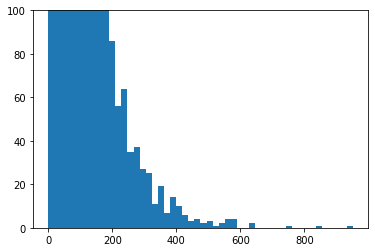

In [26]:
plt.hist(np.abs(model.coef_),bins=50)
plt.ylim(0,100)

In [24]:
np.max(np.abs(model.coef_))

951.1333757264705